In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D,
    MaxPool2D,
    Dense,
    Flatten,
    Dropout,
    Input,
    AveragePooling2D,
    Activation,
    Conv2D,
    MaxPooling2D,
    BatchNormalization,
    Concatenate,
)
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG19, EfficientNetV2L, MobileNetV2
import matplotlib.pyplot as plt


In [2]:
# Load cifar 10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train[0:100]
y_train = y_train[0:100]

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
# Normalizing
x_train = x_train / 255
x_test = x_test / 255

# One hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


### ANN Model

In [4]:
model_ann = Sequential()
model_ann.add(Dense(512, activation="leaky_relu"))
model_ann.add(Dropout(0.25))
model_ann.add(Dense(128, activation="leaky_relu"))
model_ann.add(Dropout(0.25))
model_ann.add(Flatten())
model_ann.add(Dense(32, activation="leaky_relu"))
model_ann.add(Dropout(0.25))
model_ann.add(Dense(16, activation="leaky_relu"))
model_ann.add(Dense(10, activation="softmax"))


In [5]:
callback = EarlyStopping(monitor="loss", patience=2)
model_ann.compile(
    loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]
)
history_ann = model_ann.fit(
    x_train,
    y_train_cat,
    epochs=100,
    validation_data=(x_test, y_test_cat),
    callbacks=[callback],
)


Epoch 1/100
4/4 [==============================] - 41s 13s/step - loss: 2.3123 - accuracy: 0.1000 - val_loss: 2.3182 - val_accuracy: 0.1000
Epoch 2/100
4/4 [==============================] - 41s 13s/step - loss: 2.2795 - accuracy: 0.1800 - val_loss: 2.3323 - val_accuracy: 0.1000
Epoch 3/100
4/4 [==============================] - 39s 13s/step - loss: 2.2716 - accuracy: 0.1400 - val_loss: 2.3612 - val_accuracy: 0.1000
Epoch 4/100
4/4 [==============================] - 39s 13s/step - loss: 2.2582 - accuracy: 0.1800 - val_loss: 2.4453 - val_accuracy: 0.1000
Epoch 5/100
4/4 [==============================] - 42s 14s/step - loss: 2.2680 - accuracy: 0.2000 - val_loss: 2.3848 - val_accuracy: 0.1051
Epoch 6/100
4/4 [==============================] - 39s 13s/step - loss: 2.2764 - accuracy: 0.1300 - val_loss: 2.3697 - val_accuracy: 0.1039


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


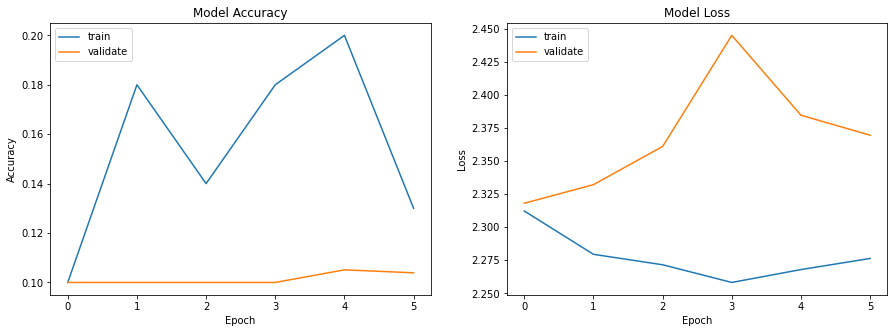

In [7]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history_ann.history.keys())
plotmodelhistory(history_ann)

In [8]:
## Evaluation

ModelLoss, ModelAccuracy = model_ann.evaluate(x_test, y_test_cat)

print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy))

313/313 [==============================] - 41s 130ms/step - loss: 2.3697 - accuracy: 0.1039
Model Loss is 2.3697285652160645
Model Accuracy is 0.1039000004529953


### Basic CNN Model

In [9]:
model_cnn = Sequential()
model_cnn.add(
    Conv2D(filters=64, kernel_size=(4, 4), input_shape=(32, 32, 3), activation="leaky_relu")
)
model_cnn.add(Dropout(0.25)) 
model_cnn.add(
    Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32, 32, 3), activation="leaky_relu")
)
model_cnn.add(MaxPool2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))
model_cnn.add(Flatten())
model_cnn.add(Dense(512, activation="leaky_relu"))
model_cnn.add(Dense(256, activation="leaky_relu"))
model_cnn.add(Dense(256, activation="leaky_relu"))
model_cnn.add(Dense(10, activation="softmax"))



In [10]:
callback = EarlyStopping(monitor="loss", patience=2)
model_cnn.compile(
    loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)
history_cnn = model_cnn.fit(
    x_train,
    y_train_cat,
    epochs=100,
    validation_data=(x_test, y_test_cat),
    callbacks=[callback],
)


Epoch 1/100
4/4 [==============================] - 15s 5s/step - loss: 2.3404 - accuracy: 0.1400 - val_loss: 2.3074 - val_accuracy: 0.1000
Epoch 2/100
4/4 [==============================] - 14s 5s/step - loss: 2.2701 - accuracy: 0.1500 - val_loss: 2.2979 - val_accuracy: 0.1137
Epoch 3/100
4/4 [==============================] - 14s 5s/step - loss: 2.1872 - accuracy: 0.1700 - val_loss: 2.3295 - val_accuracy: 0.1125
Epoch 4/100
4/4 [==============================] - 15s 5s/step - loss: 2.1305 - accuracy: 0.2400 - val_loss: 2.3186 - val_accuracy: 0.1289
Epoch 5/100
4/4 [==============================] - 14s 5s/step - loss: 2.0330 - accuracy: 0.2800 - val_loss: 2.4826 - val_accuracy: 0.1223
Epoch 6/100
4/4 [==============================] - 14s 5s/step - loss: 1.9492 - accuracy: 0.2600 - val_loss: 2.2673 - val_accuracy: 0.1763
Epoch 7/100
4/4 [==============================] - 14s 5s/step - loss: 1.8064 - accuracy: 0.5000 - val_loss: 2.2693 - val_accuracy: 0.1748
Epoch 8/100
4/4 [==========

KeyboardInterrupt: ignored

In [ ]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history_cnn.history.keys())
plotmodelhistory(history_cnn)

In [ ]:
## Evaluation

ModelLoss, ModelAccuracy = model_cnn.evaluate(x_test, y_test_cat)

print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy))

### Using VGG19 model

In [ ]:
"""vgg = VGG19(
    include_top=False,
    weights="imagenet",
    input_shape=(32, 32, 3),
    classes=10,
)"""

vgg = MobileNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=(32, 32, 3),
    classes=10,
)
vgg.trainable = True
model_vgg = Sequential()
model_vgg.add(vgg)
model_vgg.add(Flatten())
model_vgg.add(Dense(256, activation=("leaky_relu"), input_dim=512))
model_vgg.add(Dense(128, activation=("leaky_relu")))
model_vgg.add(Dense(10, activation=("softmax")))


In [ ]:
callback = EarlyStopping(monitor="loss", patience=2)
model_vgg.compile(
    loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)
history_vgg = model_vgg.fit(
    x_train,
    y_train_cat,
    epochs=100,
    validation_data=(x_test, y_test_cat),
    callbacks=[callback],
)


In [ ]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history_vgg.history.keys())
plotmodelhistory(history_vgg)

In [ ]:
## Evaluation

ModelLoss, ModelAccuracy = model_vgg.evaluate(x_test, y_test_cat)

print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy))

# Predicting for a specific image

In [11]:
# Load cifar 10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

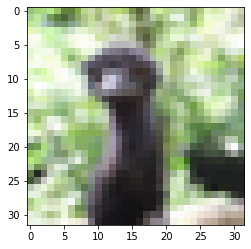

In [15]:
random_sample = x_train[55]
plt.imshow(x_train[55])

In [22]:
random_sample_array = random_sample / 255
img_batch = tf.expand_dims(random_sample_array, 0)
y_pred = model_cnn.predict(img_batch)

1/1 [==============================] - 0s 42ms/step


In [23]:
y_pred.argmax(axis=-1)

array([2])

In [24]:
y_train[55]

array([2], dtype=uint8)

In [ ]:
import tensorflow as tf
#random_sample_array = random_sample / 255
#random_sample_array.reshape(32,32)
img_batch = tf.expand_dims(random_sample_array, 0)
model_ann.predict(random_sample_array)